# Telco Churn Classification Project

## An Overview
Telco's long-term success weighs upon its customer base. Continuous gains in revenue necessitate a minimization of customers terminating our services. Churn can be triggered by many different factors such as highly incentivized packages from competitors, negative service experiences and change of individual needs are among these. As your faithful data scientist, I will retrieve, assess, and draw conclusions that are not easily detected without the inference provided by machine learning's novel insights. 

## Project Goal
By utilizing some of Python's essential tools for working with data, I will elucidate critical issues and weaknesses. This way,Telco can effectively target potential losses, gaining initiative and resourcefulness beforehand by addressing problem areas as identified by a predictive model.

# The First Stage: Data Acquisition
##### First we tap into Codeup's MySQL database and join all the necessary foreign keys so that all information relevant to this scenario is readily available for analysis.
The tables used, to this end: customers, contract_types, internet_services_types, and payment_types.
The innerworkings of this retrieval are imported from a personalized acquire module. We will now import that among all the other modules relevant to this project. These include Numpy and Pandaz for datawrangling and processing, alongside Matplotlib and Seaborn for the sake of visualization.

In [1]:
# The usual modular suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Of Mice & Machine Learning Mavericks
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.dummy import DummyClassifier
import sklearn as sk

# Cool like Jazz; A Few of my Favorite Things 
import env
import os
from acquire import get_telco_data
from prepare import prep_telco_data
from explore import describe_data, plot_target_dist, plot_internet_services, plot_services, plot_services_churn
from explore import plot_contracts, plot_pay_methods, get_churn_heatmap, countplot
from preprocessing import central_limit_theorem_test, two_sample_ttest, equal_var_test, chi2_test, evaluate_hypothesis
from model import model_metrics, baseline_model, model_more
import model_redux as model

import warnings
warnings.filterwarnings('ignore')

In [44]:
# run the user-defined function (UDF) get_telco_data IOT create a customer-based dataframe
df = get_telco_data()

Using cached csv


# Stage Two: Data Preparation
After acquisition, several steps are carried out to prepare and sanitize it. This step is essential for gaining an understanding of the data's structure. Here we also conduct initial preprocessing, identify patterns and inconsistencies in the data (i.e. missing values) and build and establish some assumptions before getting into the more rigorous ends of hypotheses formulation. 

As such, I've developed a UDF called describe_data that gives me information such as summary statistics, the number of missing values, and relative frequencies among unique values in columns. To this end, I discovered that each new customer with a tenure of zero had white space in their total_charges column, and controlled for this, among other factors via another UDF called prep_telco_data, which can be found in the prepare.py file in my repository. 

In [45]:
describe_data(df)

This dataframe has 7043 rows and 24 columns.

--------------------------------------
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 

One important distinction: I opted to manually remove a dummy from each of the newly created features among non-dichotomous value sets. Reason being, much of the time, "No Service" was a survivor among the ranks; but due to the low cost loss potentialities, and my immediate interest in peeping into Fibers innermost secrets, elements involving the absence of internet usage were left in the dust. 

In [46]:
train, test, validate = prep_telco_data(df)

Notice here how instead of seeing the variable named df, as it was before, it has now been split into three distinct samples. The target of which is, of course, churn, as it is the dependent feature for this project.

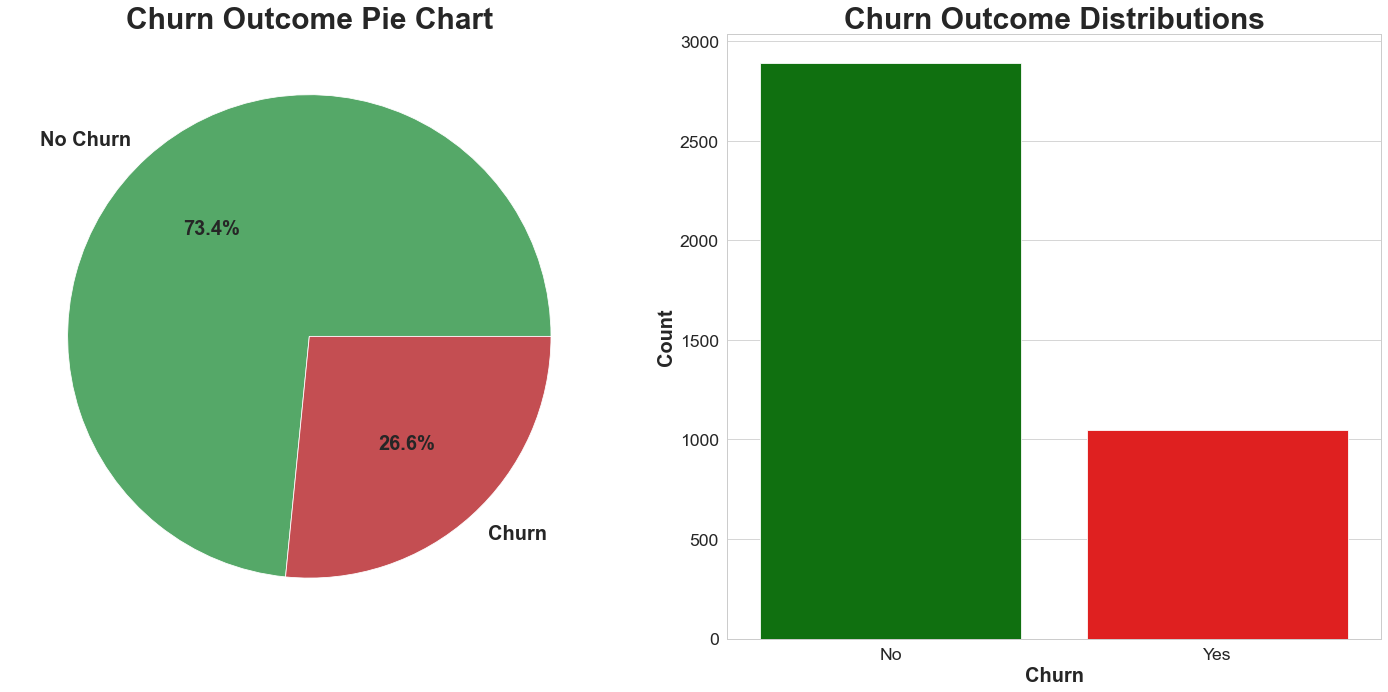

In [5]:
plot_target_dist(train)

***
# Stage Three: Exploratory Analysis

- At this juncture, via visualization we discover which features will have the largest impact on our target variable, churn. Once these are assumed, they are submitted to rigorous statistical tests.    
***
- I effectively skipped ahead to mass representation of bivariate features, since it seemed more practical to visualize the count of a particular independent variable with churn simultaneously visible.      

  - A UDF countplot allowed me to represent each of these in a tight-fit space. After scanning them, I developed a better sense of how to approach hypothesis testing. More on that in a bit.

 <function show at 0x7fba7e400700>
 <function show at 0x7fba7e400700>


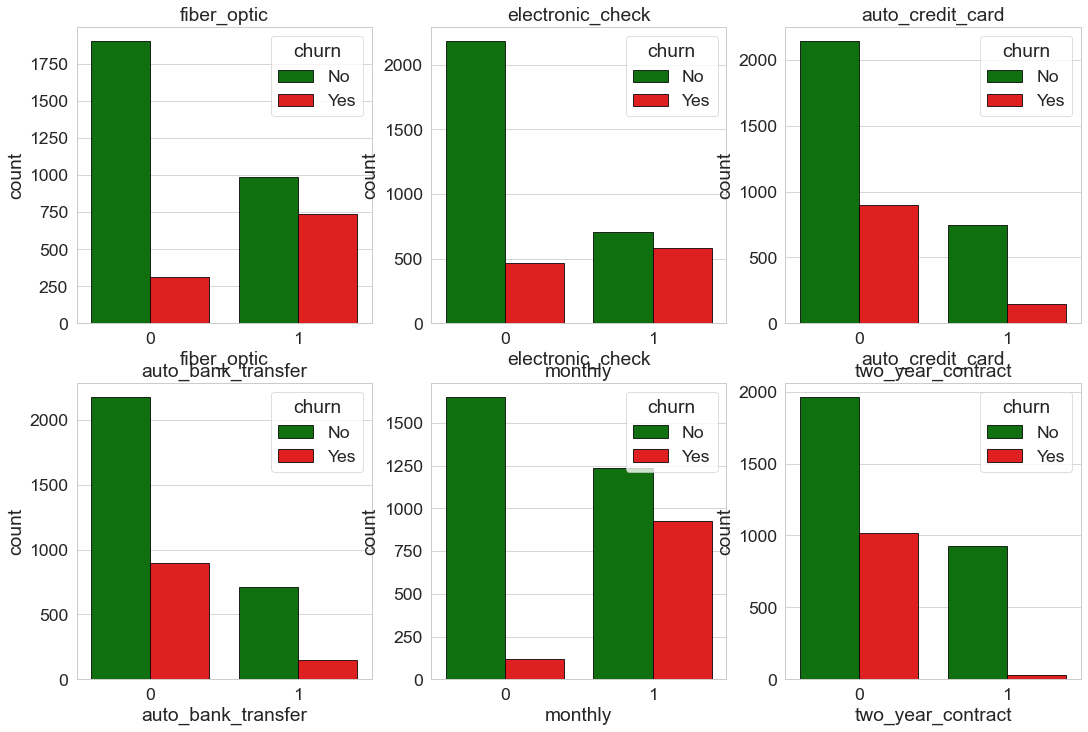

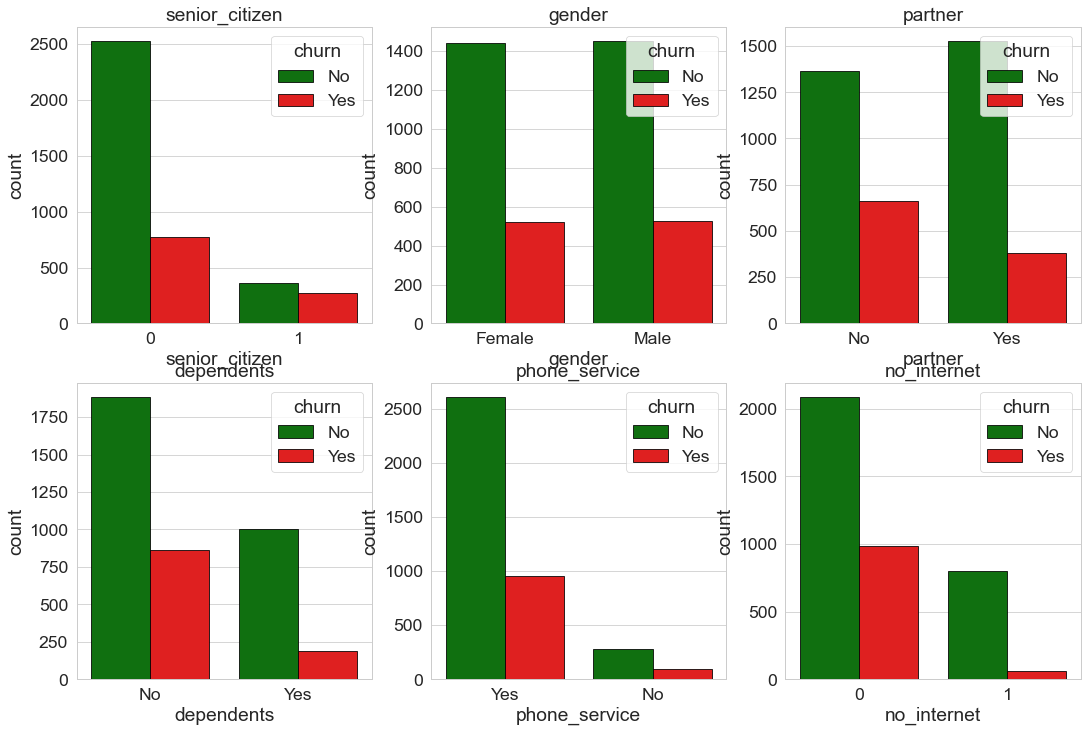

In [6]:
print(f" {countplot('churn', ['fiber_optic', 'electronic_check', 'auto_credit_card', 'auto_bank_transfer', 'monthly', 'two_year_contract'], train)}")
print(f" {countplot('churn', ['senior_citizen', 'gender', 'partner','dependents', 'phone_service', 'no_internet'], train)}")

 <function show at 0x7fba7e400700>
 <function show at 0x7fba7e400700>
 <function show at 0x7fba7e400700>
 I used this as an overview to assess which ones I wish to look more closely at


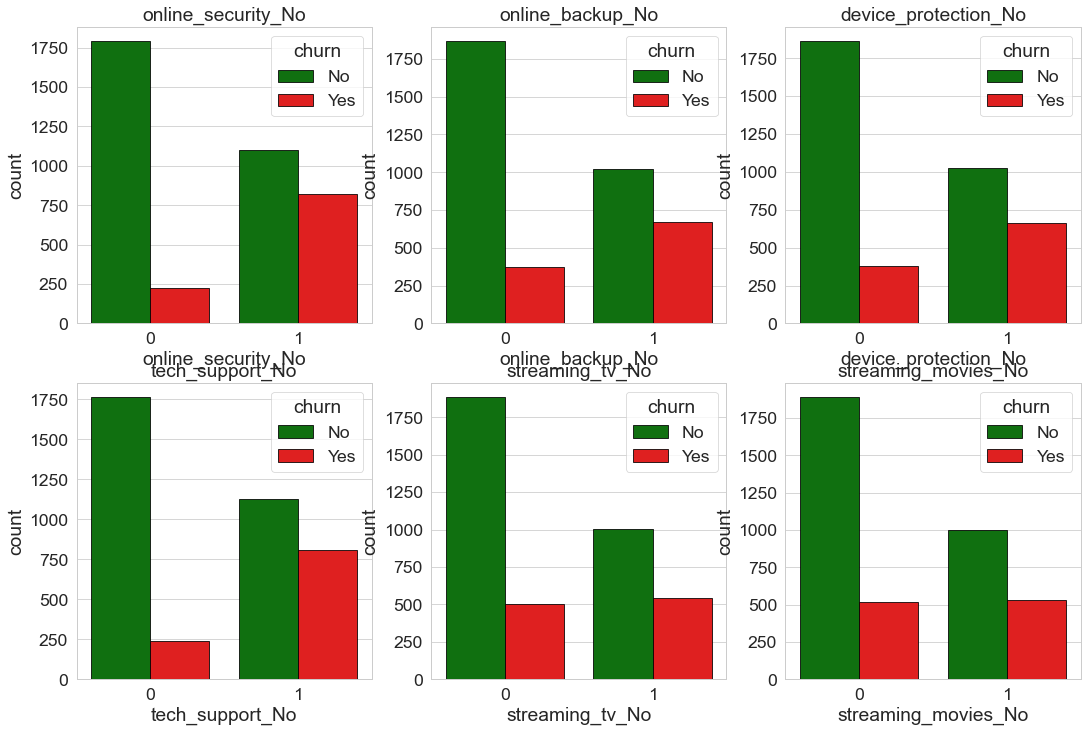

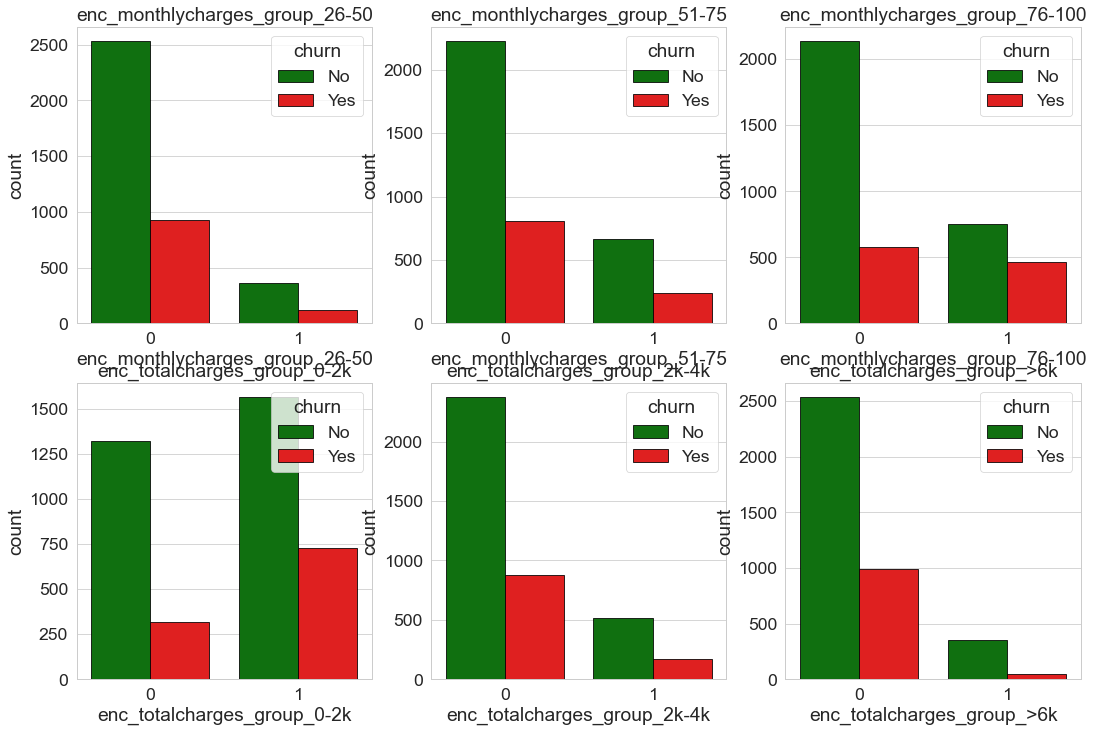

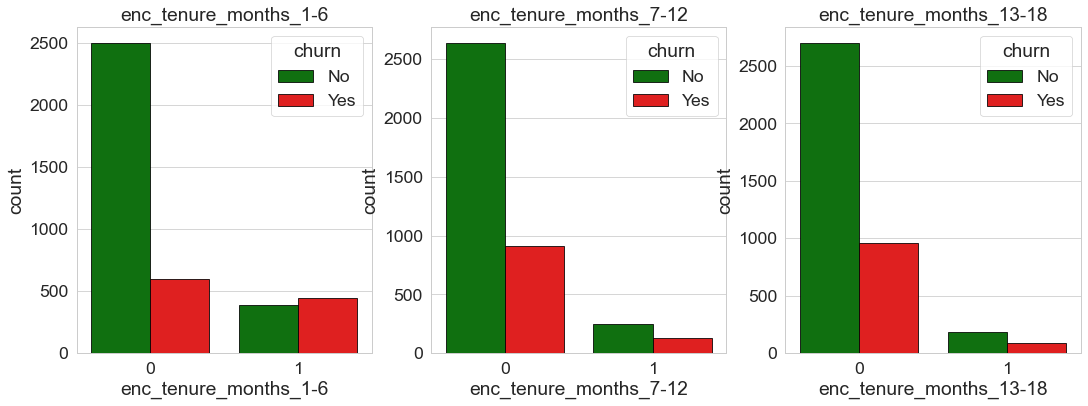

In [7]:
print(f" {countplot('churn', ['online_security_No', 'online_backup_No', 'device_protection_No','tech_support_No', 'streaming_tv_No', 'streaming_movies_No'], train)}")
print(f" {countplot('churn', ['enc_monthlycharges_group_26-50', 'enc_monthlycharges_group_51-75', 'enc_monthlycharges_group_76-100', 'enc_totalcharges_group_0-2k', 'enc_totalcharges_group_2k-4k', 'enc_totalcharges_group_>6k'], train)}")
print(f" {countplot('churn', ['enc_tenure_months_1-6', 'enc_tenure_months_7-12', 'enc_tenure_months_13-18'], train)}")
print(f' I used this as an overview to assess which ones I wish to look more closely at')

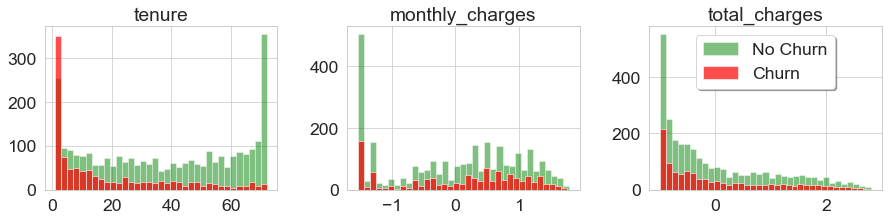

In [8]:
num_cols = ['tenure', 'monthly_charges', 'total_charges']

# look at distributions of numerical features in relation to the target variable
# it seems that as totalcharges and tenure increase, the likelihood of churn lessens.

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
train[train.churn_encoded == 0][num_cols].hist(bins=35, color="green", alpha=0.5, ax=ax)
train[train.churn_encoded == 1][num_cols].hist(bins=35, color="red", alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

# scaling has definitely helped with the axes. Future models may be interesting. 

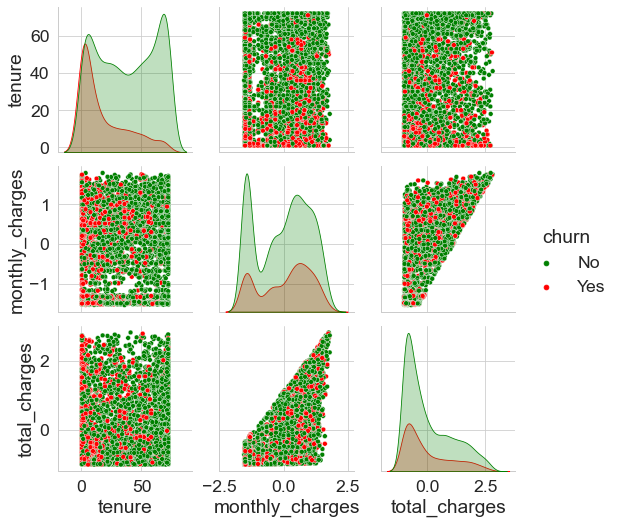

In [9]:
#Multivariate
# create and display a pairplot comparing the distributions of each quantitative variable
    # in each category of the target variable
target = 'churn'
g = sns.pairplot(train[num_cols + [target]], hue=target, palette=['#008000','#FF0000'])
plt.show()

<AxesSubplot:title={'center':'Features Correlated with Churn'}>

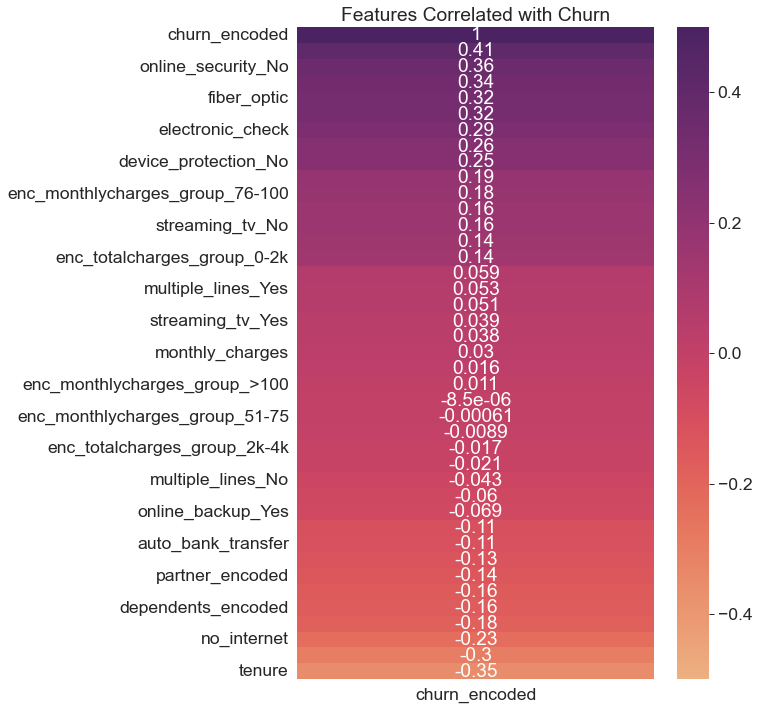

In [10]:
get_churn_heatmap(train)

### Hypothesis Building
- Looking at the features included in data and connecting them to their potential influence on customer churn, the following hypotheses can be made:
  - The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the potential termination decision. Perhaps the penalty for breaking contract would be beyond consideration. 
  - Customers, as long as they are internet users, are willing to cancel simple contracts with few associated product components quicker and more often than more complex bundles — perhaps customers value the reduced administrative complexity. They might also be hesitant to cancel a contract, when they depend on the additional service components (e.g. security packages).
  - Electronic checks are essentially proportional to the other payment methods and yet are inordinately more likely to churn. This may be consequential of the payment process being more difficult than intended or assume. 
  - Fiber optics enjoy a simple majority among clientele, but much like electronic checks, considerably overshadow the other options in terms of churn. Perhaps there is a link between the two, as well. 

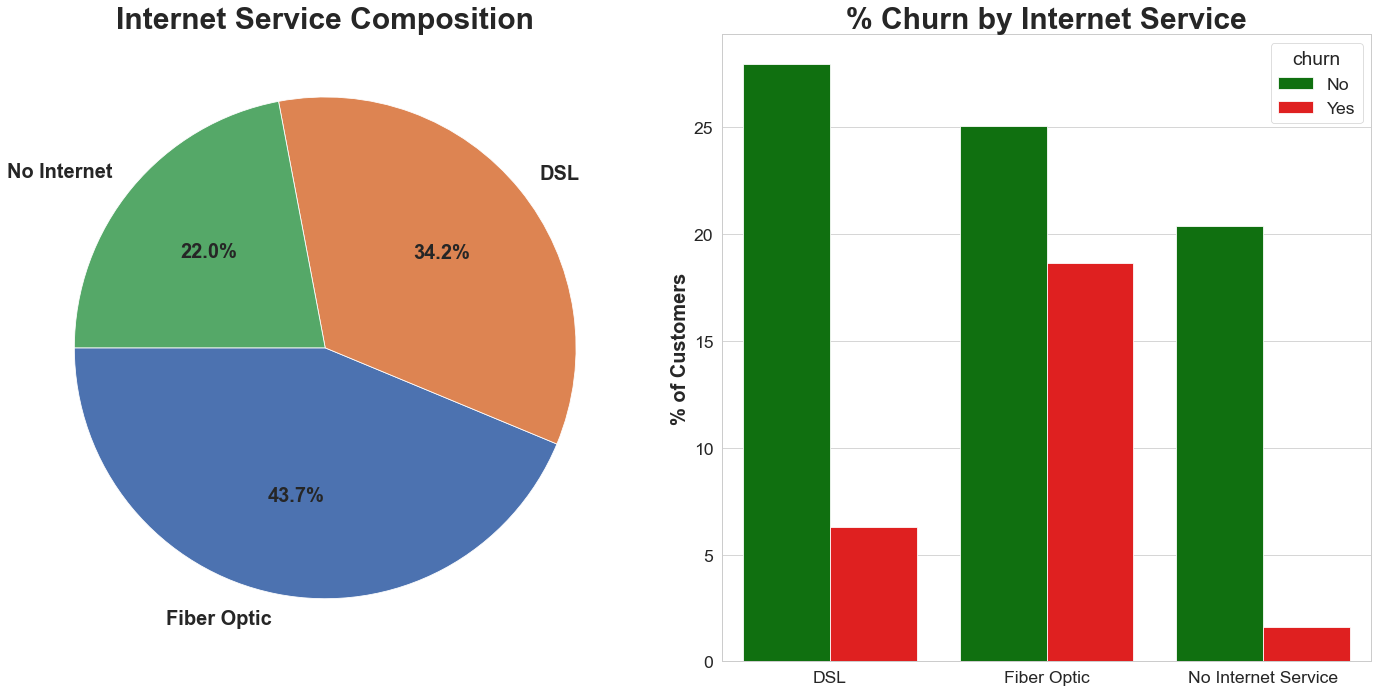

In [11]:
plot_internet_services(train)

- $H_0$: A customer's internet service type is independent of their potential for churn.
- $H_A$: Internet Service Type and Churn have some interplay, and churn may even depend upon this feature.. 

In [12]:
chi2_test(train.churn, train.internet_service_type)

Observed

[[1101  987  803]
 [ 247  735   64]]
---
Expected

[[ 989.9 1264.5  636.7]
 [ 358.1  457.5  230.3]]
---

chi^2 = 439.7661
p     = 0.0000

Reject H0


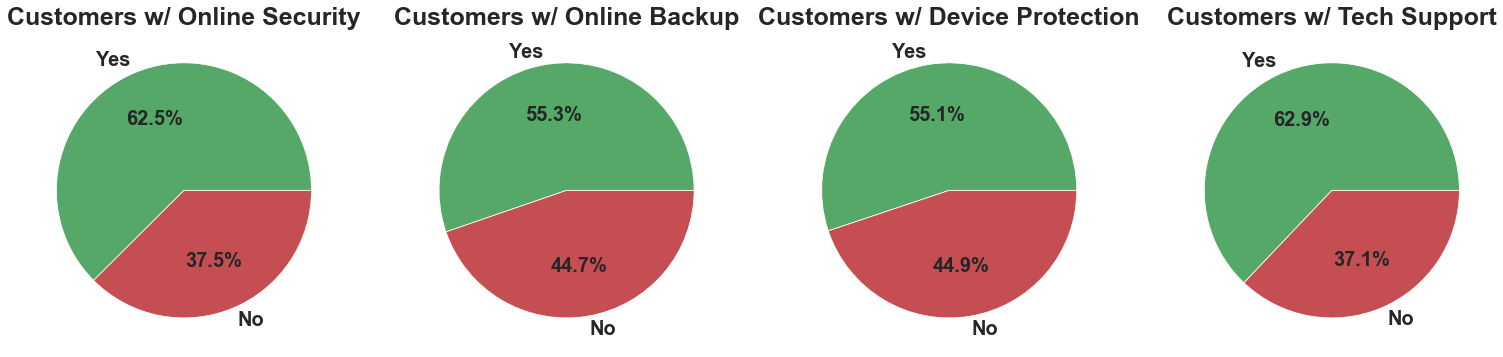

In [13]:
plot_services(train)

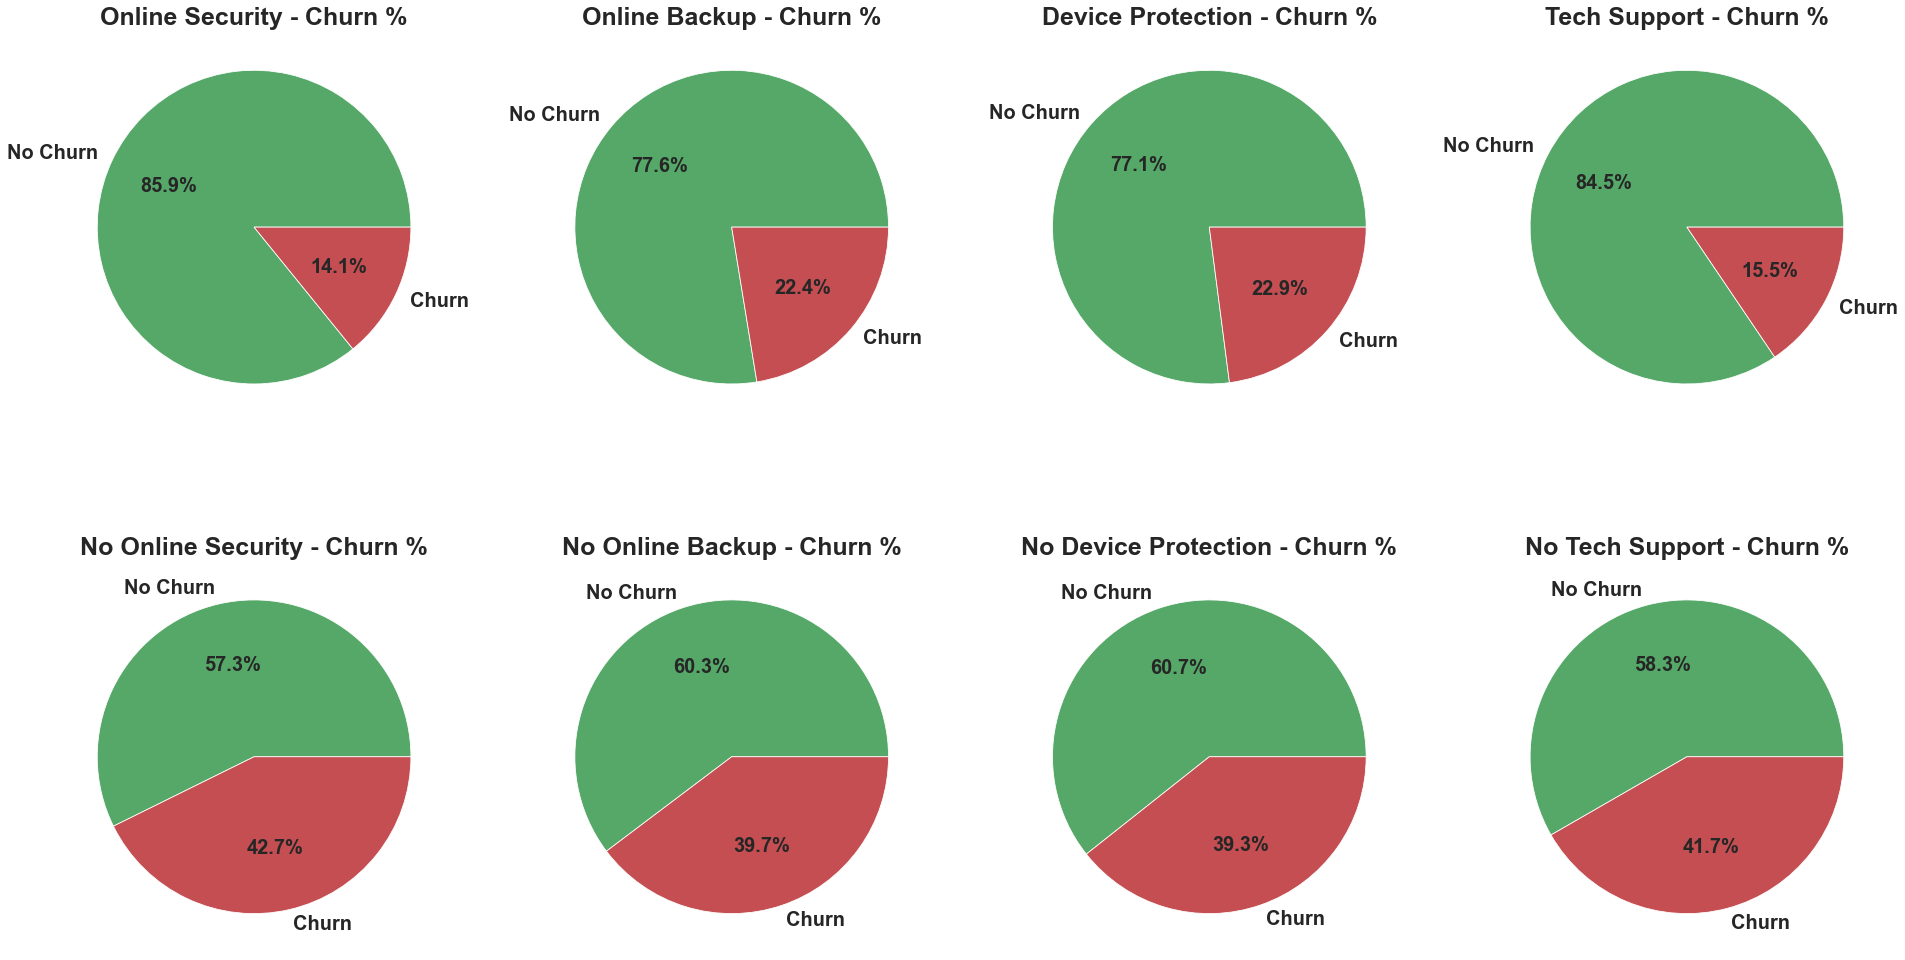

In [14]:
plot_services_churn(train)

- $H_0$: A customer's additional services is independent of their potential for churn.
- $H_A$: Additional services and Churn have some interplay, and churn may even depend upon this feature. 

In [15]:
chi2_test(train.churn, train.online_security)

Observed

[[1099  803  989]
 [ 819   64  163]]
---
Expected

[[1408.4  636.7  845.9]
 [ 509.6  230.3  306.1]]
---

chi^2 = 510.5206
p     = 0.0000

Reject H0


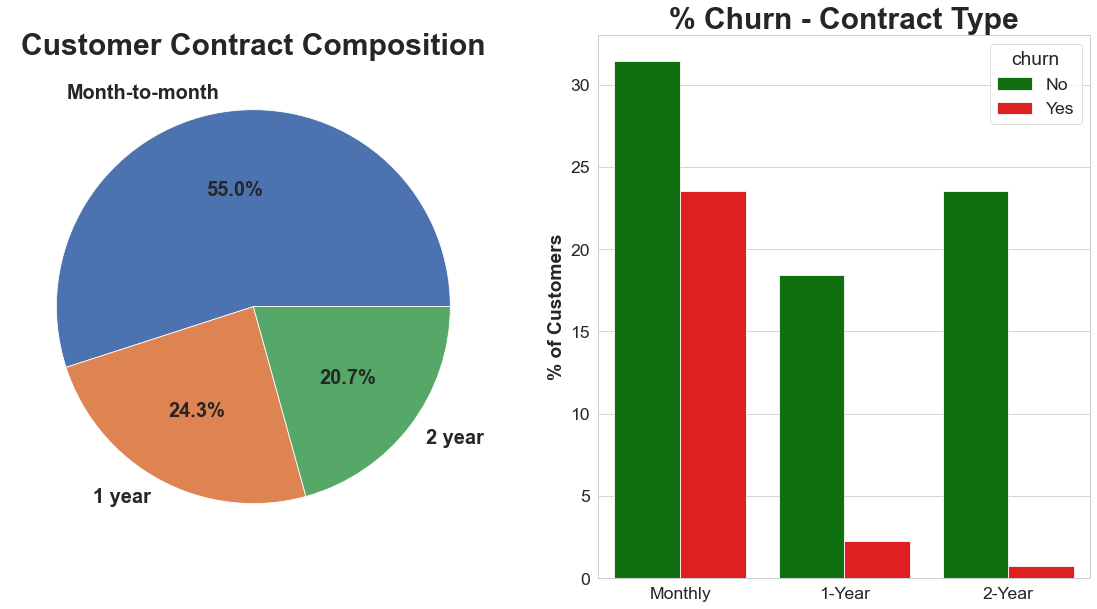

In [16]:
plot_contracts(train)

- $H_0$: Whether or not a customer is bound by contract is independent of their potential for churn.
- $H_A$: Contract or the lackthereof significantly influences churn. 

In [17]:
chi2_test(train.churn, train.contract_type)

Observed

[[1238  726  927]
 [ 927   89   30]]
---
Expected

[[1589.8  598.5  702.7]
 [ 575.2  216.5  254.3]]
---

chi^2 = 664.6572
p     = 0.0000

Reject H0


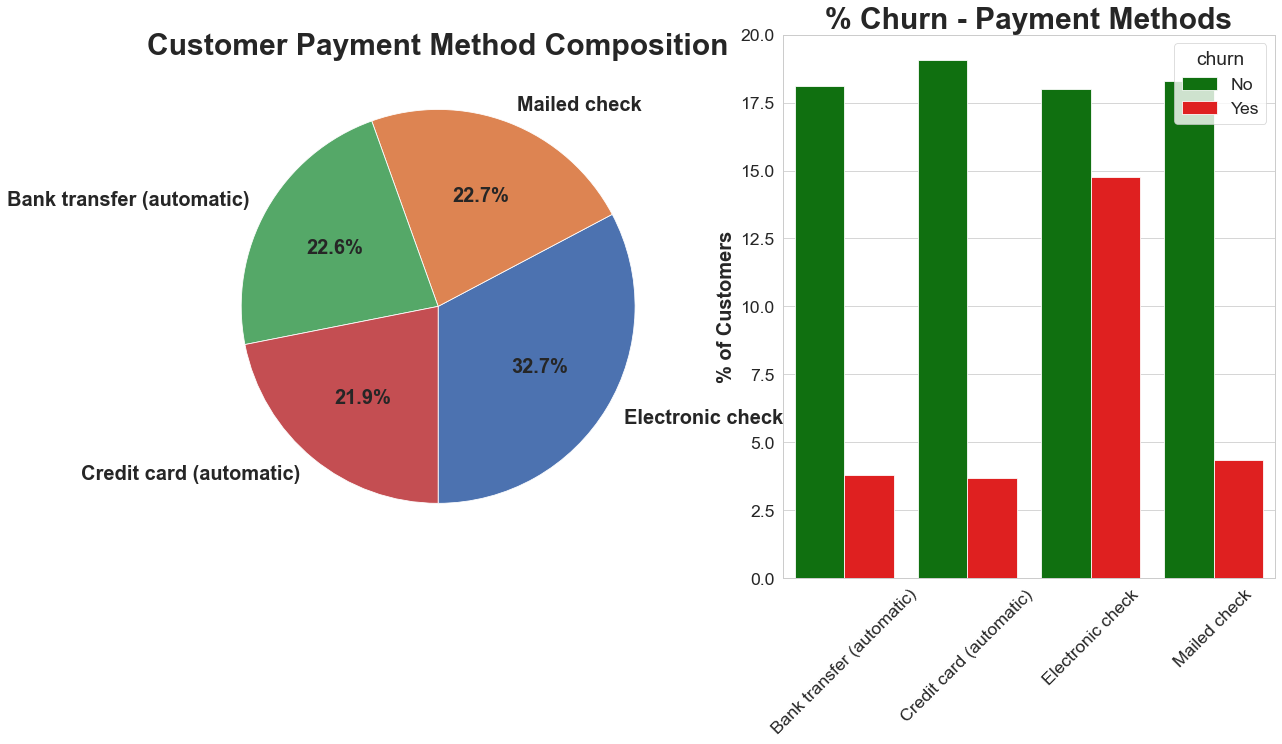

In [18]:
plot_pay_methods(train)

- $H_0$: There is not a significant connection between payment type and churn rates.
- $H_A$: Non-automatic payment types churn in greater quantities 

In [19]:
chi2_test(train.churn, train.payment_type)

Observed

[[713 750 708 720]
 [149 145 581 171]]
---
Expected

[[633.  657.2 946.5 654.3]
 [229.  237.8 342.5 236.7]]
---

chi^2 = 338.4852
p     = 0.0000

Reject H0


---

## Stage Four: Modeling (Old Version)

In this section, I used all the features that were created or maintained in the preparation section to feed into Recursive Feature Engineering algorithms and then created Decision Tree, Random Forest, and Logistic Regression algorithms using the selected sets of features and varying hyperparameters.

I created 264 unique models that varied the number of features selected and the values for the appropriate hyperparameters for that model type.

I stored information about each of the models' performance and parameters as dataframes, and cached those dataframes as CSV's on my local drive.

To prevent redoing the time-consuming computation required to create those models, I will use the cached data to display information about model performance below.

(to recreate the modeling that produced the CSV's, please see model.py and/or model_notebook.ipynb)

In [ ]:
# read model_info and model_results CSV's into pandas from the local directory
model_info = pd.read_csv('model_info_1.csv').drop(columns='Unnamed: 0')
model_results = pd.read_csv('model_results_1.csv').drop(columns='Unnamed: 0')

In [47]:
target = 'churn_encoded'
positive = 1

In [48]:
features = [
    'monthly', 'two_year_contract', 'fiber_optic', 'electronic_check',
    'enc_tenure_months_1-6', 'enc_tenure_months_7-12', 'enc_tenure_months_13-18',
    'auto_credit_card', 'auto_bank_transfer', 'no_internet',
    'online_security_No', 'online_security_Yes', 'online_backup_No', 'online_backup_Yes',
    'device_protection_No', 'device_protection_Yes', 'tech_support_No', 'tech_support_Yes'   
]
X_train, y_train = train[features], train.churn_encoded
X_validate, y_validate = validate[features], validate.churn_encoded

In [49]:
model_info = pd.DataFrame()
model_results = pd.DataFrame()
model_number = 0

First, I created baseline predictions using the most common outcome type ('Adoption') and evaluated the performance of those predictions:

In [50]:
#baseline, baseline_pred = baseline_model(X_train, y_train)

In [51]:
#baseline = 0

In [52]:
model_number, model_info, model_results = model.run_baseline(train,
                                                       validate,
                                                       target,
                                                       positive,
                                                       model_number,
                                                       model_info,
                                                       model_results)

## RFE DECISION TREE

In [56]:
model_number, model_info, model_results = model.rfe_decision_tree(train,
                                                                  validate, 
                                                                  target, 
                                                                  positive, 
                                                                  model_number, 
                                                                  model_info, 
                                                                  model_results)

Generating 1 of 88 models.     
Generating 2 of 88 models.     
Generating 3 of 88 models.     
Generating 4 of 88 models.     
Generating 5 of 88 models.     
Generating 6 of 88 models.     
Generating 7 of 88 models.     
Generating 8 of 88 models.     
Generating 9 of 88 models.     
Generating 10 of 88 models.     
Generating 11 of 88 models.     
Generating 12 of 88 models.     
Generating 13 of 88 models.     
Generating 14 of 88 models.     
Generating 15 of 88 models.     
Generating 16 of 88 models.     
Generating 17 of 88 models.     
Generating 18 of 88 models.     
Generating 19 of 88 models.     
Generating 20 of 88 models.     
Generating 21 of 88 models.     
Generating 22 of 88 models.     
Generating 23 of 88 models.     
Generating 24 of 88 models.     
Generating 25 of 88 models.     
Generating 26 of 88 models.     
Generating 27 of 88 models.     
Generating 28 of 88 models.     
Generating 29 of 88 models.     
Generating 30 of 88 models.     
Generating 31 of 88

## RFE RANDOM FOREST

In [57]:
model_number, model_info, model_results = model.rfe_random_forest(train,
                                                                  validate, 
                                                                  target, 
                                                                  positive, 
                                                                  model_number, 
                                                                  model_info, 
                                                                  model_results)

Generating 1 of 99 models.     
Generating 2 of 99 models.     
Generating 3 of 99 models.     
Generating 4 of 99 models.     
Generating 5 of 99 models.     
Generating 6 of 99 models.     
Generating 7 of 99 models.     
Generating 8 of 99 models.     
Generating 9 of 99 models.     
Generating 10 of 99 models.     
Generating 11 of 99 models.     
Generating 12 of 99 models.     
Generating 13 of 99 models.     
Generating 14 of 99 models.     
Generating 15 of 99 models.     
Generating 16 of 99 models.     
Generating 17 of 99 models.     
Generating 18 of 99 models.     
Generating 19 of 99 models.     
Generating 20 of 99 models.     
Generating 21 of 99 models.     
Generating 22 of 99 models.     
Generating 23 of 99 models.     
Generating 24 of 99 models.     
Generating 25 of 99 models.     
Generating 26 of 99 models.     
Generating 27 of 99 models.     
Generating 28 of 99 models.     
Generating 29 of 99 models.     
Generating 30 of 99 models.     
Generating 31 of 99

## RFE LOGISTIC REGRESSION

In [58]:
model_number, model_info, model_results = model.rfe_log_regression(train,
                                                                  validate, 
                                                                  target, 
                                                                  positive, 
                                                                  model_number, 
                                                                  model_info, 
                                                                  model_results)

Generating 1 of 77 models.          
Generating 2 of 77 models.          
Generating 3 of 77 models.          
Generating 4 of 77 models.          
Generating 5 of 77 models.          
Generating 6 of 77 models.          
Generating 7 of 77 models.          
Generating 8 of 77 models.          
Generating 9 of 77 models.          
Generating 10 of 77 models.          
Generating 11 of 77 models.          
Generating 12 of 77 models.          
Generating 13 of 77 models.          
Generating 14 of 77 models.          
Generating 15 of 77 models.          
Generating 16 of 77 models.          
Generating 17 of 77 models.          
Generating 18 of 77 models.          
Generating 19 of 77 models.          
Generating 20 of 77 models.          
Generating 21 of 77 models.          
Generating 22 of 77 models.          
Generating 23 of 77 models.          
Generating 24 of 77 models.          
Generating 25 of 77 models.          
Generating 26 of 77 models.          
Generating 27 of 77 m

## MODEL EVALUATION

In [59]:
model.display_model_results(model_results)

model_number                    1         2         3         4         5  \
metric_type sample_type                                                     
accuracy    train        0.759970  0.759970  0.759970  0.759970  0.759970   
            validate     0.774698  0.774698  0.774698  0.774698  0.774698   
f1_score    train        0.242181  0.242181  0.242181  0.242181  0.242181   
            validate     0.321199  0.321199  0.321199  0.321199  0.321199   
precision   train        0.751244  0.751244  0.751244  0.751244  0.751244   
            validate     0.806452  0.806452  0.806452  0.806452  0.806452   
recall      train        0.144359  0.144359  0.144359  0.144359  0.144359   
            validate     0.200535  0.200535  0.200535  0.200535  0.200535   

model_number                    6         7         8         9        10  \
metric_type sample_type                                                     
accuracy    train        0.759970  0.759970  0.759970  0.767082  0.767082   
            validate     0.774698  0.774698  0.774698  0.773276  0.773276   
f1_score    train        0.242181  0.242181  0.242181  0.401045  0.401045   
            validate     0.321199  0.321199  0.321199  0.450947  0.450947   
precision   train        0.751244  0.751244  0.751244  0.632990  0.632990   
            validate     0.806452  0.806452  0.806452  0.632850  0.632850   
recall      train        0.144359  0.144359  0.144359  0.293499  0.293499   
            validate     0.200535  0.200535  0.200535  0.350267  0.350267   

model_number             ...       256       257       258       259  \
metric_type sample_type  ...                                           
accuracy    train        ...  0.787656  0.787656  0.734315  0.759970   
            validate     ...  0.788202  0.788202  0.734186  0.774698   
f1_score    train        ...  0.563218  0.563218  0.000000  0.242181   
            validate     ...  0.573066  0.573066  0.000000  0.321199   
precision   train        ...  0.620968  0.620968  0.000000  0.751244   
            validate     ...  0.617284  0.617284  0.000000  0.806452   
recall      train        ...  0.515296  0.515296  0.000000  0.144359   
            validate     ...  0.534759  0.534759  0.000000  0.200535   

model_number                  260       261       262       263       264  \
metric_type sample_type                                                     
accuracy    train        0.784354  0.787656  0.787656  0.787656  0.787656   
            validate     0.791756  0.788202  0.788202  0.788202  0.788202   
f1_score    train        0.485143  0.520642  0.563218  0.563218  0.563218   
            validate     0.510851  0.534375  0.573066  0.573066  0.573066   
precision   train        0.663350  0.650430  0.620968  0.620968  0.620968   
            validate     0.680000  0.642857  0.617284  0.617284  0.617284   
recall      train        0.382409  0.434034  0.515296  0.515296  0.515296   
            validate     0.409091  0.457219  0.534759  0.534759  0.534759   

model_number             baseline  
metric_type sample_type            
accuracy    train        0.734315  
            validate     0.734186  
f1_score    train        0.000000  
            validate     0.000000  
precision   train        0.000000  
            validate     0.000000  
recall      train        0.000000  
            validate     0.000000  

[8 rows x 265 columns]

In [60]:
model.display_model_results(model_results[model_results.model_number == 'baseline'])

model_number             baseline
metric_type sample_type          
accuracy    train        0.734315
            validate     0.734186
f1_score    train        0.000000
            validate     0.000000
precision   train        0.000000
            validate     0.000000
recall      train        0.000000
            validate     0.000000

In [61]:
model.display_model_results(model.get_best_model_results(model_results))

model_number                  239       246       260
metric_type sample_type                              
accuracy    train        0.784354  0.784354  0.784354
            validate     0.791756  0.791756  0.791756
f1_score    train        0.485143  0.485143  0.485143
            validate     0.510851  0.510851  0.510851
precision   train        0.663350  0.663350  0.663350
            validate     0.680000  0.680000  0.680000
recall      train        0.382409  0.382409  0.382409
            validate     0.409091  0.409091  0.409091

In [63]:
for model_num in [239, 246, 260]:
    print(f'Model #{model_num} Features:')
    print('-' * 20)
    for feature in model_info[model_info.model_number == model_num].features.values[0]:
        print(feature)
    print()

Model #239 Features:
--------------------
enc_monthlycharges_group_51-75
enc_monthlycharges_group_76-100
enc_monthlycharges_group_>100
enc_totalcharges_group_0-2k
enc_totalcharges_group_2k-4k
enc_totalcharges_group_>6k
enc_tenure_months_1-6
enc_tenure_months_13-18
enc_tenure_months_7-12

Model #246 Features:
--------------------
enc_monthlycharges_group_26-50
enc_monthlycharges_group_51-75
enc_monthlycharges_group_76-100
enc_monthlycharges_group_>100
enc_totalcharges_group_0-2k
enc_totalcharges_group_2k-4k
enc_totalcharges_group_>6k
enc_tenure_months_1-6
enc_tenure_months_13-18
enc_tenure_months_7-12

Model #260 Features:
--------------------
enc_monthlycharges_group_26-50
enc_monthlycharges_group_51-75
enc_monthlycharges_group_76-100
enc_monthlycharges_group_>100
enc_totalcharges_group_0-2k
enc_totalcharges_group_2k-4k
enc_totalcharges_group_>6k
enc_tenure_months_1-6
enc_tenure_months_13-18
enc_tenure_months_7-12



---
## I have to stop here since I cannot fit this to the test data, since that was already performed in the past.

In [68]:
features = [
    'monthly', 'two_year_contract', 'fiber_optic', 'electronic_check',
    'enc_tenure_months_1-6', 'enc_tenure_months_7-12', 'enc_tenure_months_13-18',
    'auto_credit_card', 'auto_bank_transfer', 'no_internet',
    'online_security_No', 'online_security_Yes', 'online_backup_No', 'online_backup_Yes',
    'device_protection_No', 'device_protection_Yes', 'tech_support_No', 'tech_support_Yes'   
]
X_train, y_train = train[features], train.churn_encoded
X_validate, y_validate = validate[features], validate.churn_encoded

In [70]:
baseline, baseline_pred = baseline_model(X_train, y_train)


               Baseline Accuracy Score: 73.43%
        First Ten Baseline Predictions: [0 0 0 0 0 0 0 0 0 0]
        


In [71]:
print('----------Decision Tree--------')
print(f'{model_metrics(X_train, y_train, y_pred)}')
print(f'accuracy score is {round(accuracy_score(y_train, y_pred),2)}')

----------Decision Tree--------


NameError: name 'y_pred' is not defined

In [ ]:
print('----------Random Forest---------')
print(f'{model_metrics(X_train, y_train, y_pred2)}')
print(f'accuracy score is {round(accuracy_score(y_train, y_pred2),2)}')

In [ ]:
print('----------K-Nearest Neighbors---------')
print(f'{model_metrics(X_train, y_train, y_pred3)}')
print(f'accuracy score is {round(accuracy_score(y_train, y_pred3),2)}')

In [ ]:
# Final Test

# re-creating the model using the given features and hyperparameters

# separate each sample into x (features) and y (target)
x_train = train[features]
y_train = train.churn_encoded

x_test = test[features]
y_test = test.churn_encoded

# create the classifier

# Best working KNN
clf = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 6, min_samples_leaf = 1,
                              min_samples_split = 30)


# fit the classifier to the training data
clf = clf.fit(x_train, y_train)

# create predictions for the model's performance on the test set
y_pred = clf.predict(x_test)

# establish the probability for those predictions created above
y_pred_proba = clf.predict_proba(x_test)[:,1]

print('model accuracy: ', accuracy_score(y_test, y_pred))


# Conclusion
The data science pipeline has given us insight, and since it was not shutdown (completely) along the way, we learned about significant impacts on churn all without raising gas prices. Those who utilize our internet connections but decline our additional services such as tech_support are at high risk for churning; if it is the case that these services are unavailable or more expensive to those who are not on contract, then we must examine alternatives.

Fun little factoid: it has been known for quite some time that if a person has the knowledge of how to tap into a fiber optics network, they can easily do so. If the security attacker can access the physical fiber optic cable, they can retrieve the packets sent in the connection. The attackers can tamper with the information and have access to delicate information. Who's to say that the last year has not been plagued by a malicious agent?

We also are not given adequate information location to determine whether or not the key service area is one where contract-work is common. If we are in an area where it is not uncommon for someone to work in 6 month incremements, then tenure itself would come as no surprise.  

### Given more time I would
create more grouped columns and datframes that capture in particular internet users exclusively, examining it along demographic lines that were not necessarily valid or interesting when considered on the whole, such as among single users. I would also like to know how often tech_support has to render their services and if that is indicative of faultiness in the integrity of our fiber optic channels. 